In [45]:
import cv2
import matplotlib.pyplot as plt

## 1.3 Operacje wejścia/wyjścia

### 1.3.1 Wczytywanie, wy´swietlanie i zapisywanie obrazu z wykorzystaniem OpenCV

In [46]:
I = cv2.imread('mats/mandril.jpg', cv2.IMREAD_GRAYSCALE)

# show the image
cv2.imshow("Mandril",I) # display
cv2.waitKey(0) # wait for key

-1

In [47]:
cv2.imwrite("mats/m.png",I) # zapis obrazu do pliku

True

In [48]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type


(512, 512)
262144
uint8


### Wczytywanie, wyświetlanie i zapisywanie obrazu z wykorzystaniem modułu Matplotlib

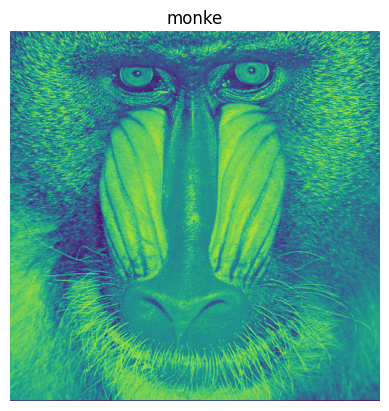

In [49]:
# show the image in notebook

plt.figure(1) # create figure
plt.imshow(I) # add image
plt.title("monke") # add title
plt.axis("off") # disable display of the coordinate system
plt.show() # display

plt.imsave("mats/mandril_plt_save.png",I,cmap="gray")

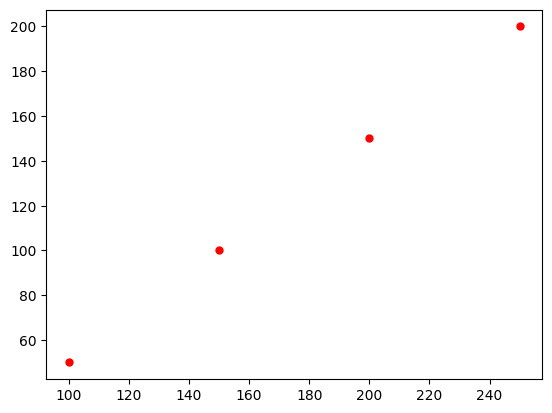

In [50]:
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.plot(x,y,"r.",markersize=10)

## 1.4 Konwersje przestrzenii barw

### 1.4.1 OpenCV

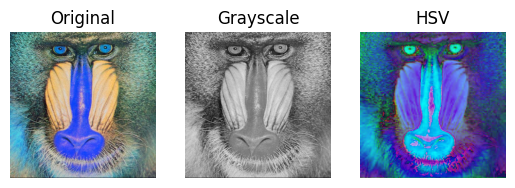

In [51]:
# convert image I into grayscale and HSV, then show the result

I = cv2.imread('mats/mandril.jpg', cv2.IMREAD_COLOR)

I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I_hsv = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

plt.figure(2)
plt.subplot(1,3,1)
plt.imshow(I)
plt.axis("off")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(I_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale")

plt.subplot(1,3,3)
plt.imshow(I_hsv)
plt.axis("off")
plt.title("HSV")

plt.show()

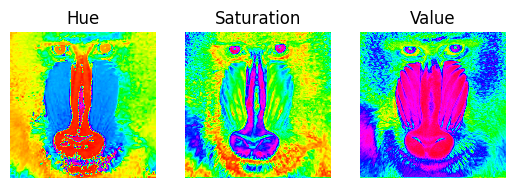

In [52]:
#Display the HSV channels

H, S, V = cv2.split(I_hsv)

plt.figure(3)
plt.subplot(1,3,1)
plt.imshow(H, cmap="hsv")
plt.axis("off")
plt.title("Hue")

plt.subplot(1,3,2)
plt.imshow(S, cmap="hsv")
plt.axis("off")
plt.title("Saturation")

plt.subplot(1,3,3)
plt.imshow(V, cmap="hsv")
plt.axis("off")
plt.title("Value")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


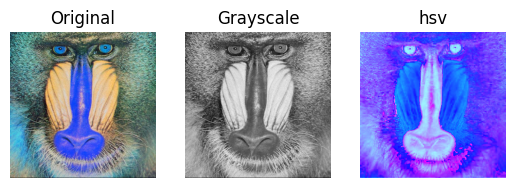

In [53]:
def rgb2gray(I):
    return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2]

import matplotlib # add at the top of the file
_HSV = matplotlib.colors.rgb_to_hsv(I)

plt.figure(4)
plt.subplot(1,3,1)
plt.imshow(I)
plt.axis("off")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(rgb2gray(I), cmap="gray")
plt.axis("off")
plt.title("Grayscale")

plt.subplot(1,3,3)
plt.imshow(_HSV)
plt.axis("off")
plt.title("hsv")


plt.show()



## 1.5 Skalowanie, zmiana rozdzielczości przy u˙zyciu OpenCV

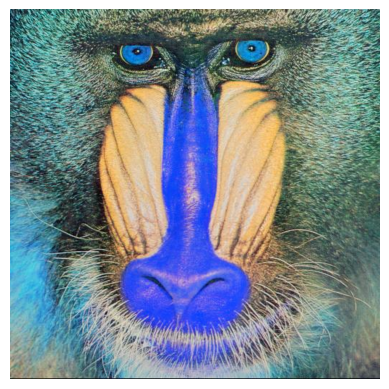

In [54]:
height, width =I.shape[:2] 
scale = 1.75 # scale factor

I_scaled = cv2.resize(I, (int(scale*width), int(scale*height)), interpolation = cv2.INTER_CUBIC)

plt.figure(5)
plt.imshow(I_scaled)
plt.axis("off")

plt.show()

## 1.6 Operacje arytmetyczne

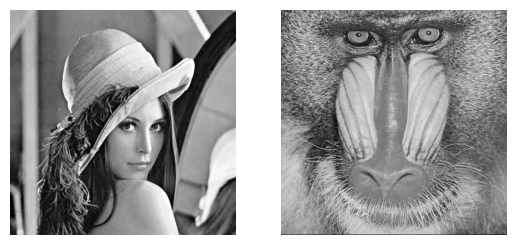

In [55]:
lena = cv2.imread('mats/lena.png', cv2.IMREAD_COLOR)
mandril = cv2.imread('mats/mandril.jpg', cv2.IMREAD_COLOR)
#grayscale

lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
mandril_gray = cv2.cvtColor(mandril, cv2.COLOR_BGR2GRAY)

#display
plt.figure(6)

plt.subplot(1,2,1)
plt.imshow(lena_gray, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mandril_gray, cmap="gray")
plt.axis("off")

plt.show()

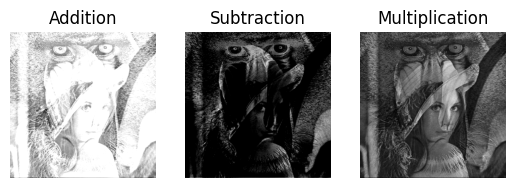

In [56]:
# add, subtract, multiply, with normalisation

I_add = cv2.add(lena_gray, mandril_gray)
I_subtract = cv2.subtract(lena_gray, mandril_gray)
I_multiply = cv2.multiply(lena_gray, mandril_gray, scale=1/255)

plt.figure(7)

plt.subplot(1,3,1)
plt.imshow(I_add, cmap="gray")
plt.axis("off")
plt.title("Addition")

plt.subplot(1,3,2)
plt.imshow(I_subtract, cmap="gray")
plt.axis("off")
plt.title("Subtraction")

plt.subplot(1,3,3)
plt.imshow(I_multiply, cmap="gray")
plt.axis("off")
plt.title("Multiplication")

plt.show()


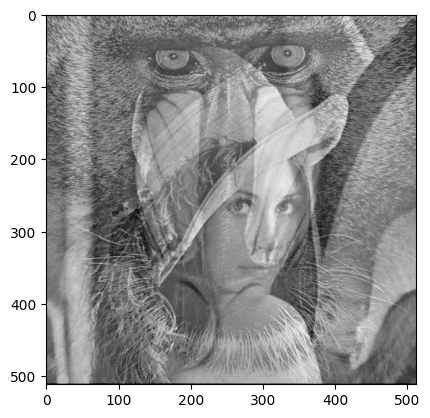

In [57]:
# linear combination

def linear_combination(I1, I2, alpha):
    return cv2.addWeighted(I1, alpha, I2, 1-alpha, 0)

I_combination = linear_combination(lena_gray, mandril_gray, 0.5)

plt.imshow(I_combination, cmap="gray")

Text(0.5, 1.0, 'Absolute difference of div')

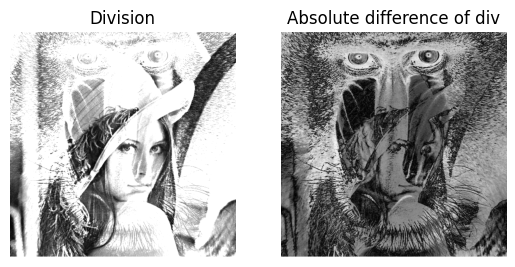

In [58]:
# dividing two images, absdiff

I_divide = cv2.divide(lena_gray, mandril_gray, scale=255)

I_absdiff = cv2.absdiff(I_divide, mandril_gray)

plt.figure(8)

plt.subplot(1,2,1)
plt.imshow(I_divide, cmap="gray")
plt.axis("off")
plt.title("Division")

plt.subplot(1,2,2)
plt.imshow(I_absdiff, cmap="gray")
plt.axis("off")
plt.title("Absolute difference of div")

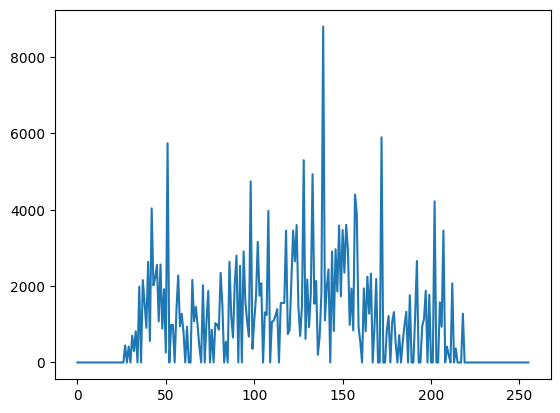

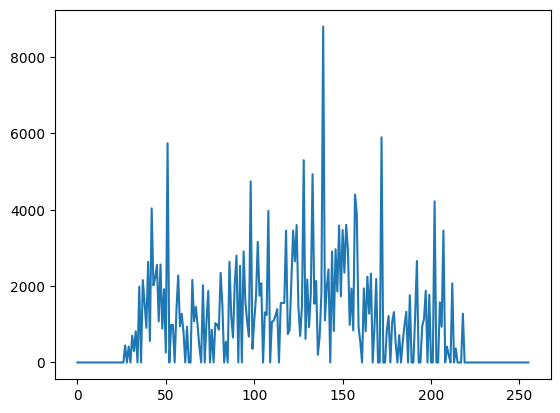

In [59]:
import numpy as np
def hist(img):
    h = np.zeros((256,1),np.float32)
    height, width = img.shape
    for i in range(height):
        for j in range(width):
            h[img[i,j]]+=1

    return h

hist1 = hist(lena_gray)
hist_cv = cv2.calcHist([lena_gray],[0],None,[256],[0,256])

plt.figure(9)
plt.plot(hist1)
plt.show()
plt.plot(hist_cv)
plt.show()

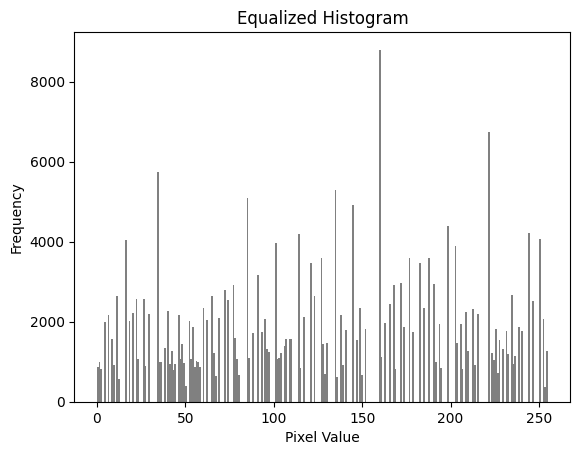

In [60]:
# Cv2 eqalizer
I_equalized = cv2.equalizeHist(lena_gray)

plt.figure(10)
plt.hist(I_equalized.flatten(), bins=256, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Equalized Histogram')
plt.show()




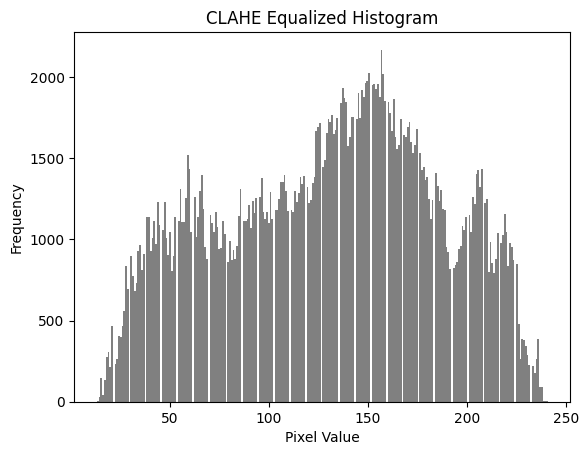

In [61]:
# CLAHE equalizer

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
I_clahe = clahe.apply(lena_gray)

plt.figure(11)
plt.hist(I_clahe.flatten(), bins=256, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('CLAHE Equalized Histogram')

plt.show()

## 1.9 Filtracja

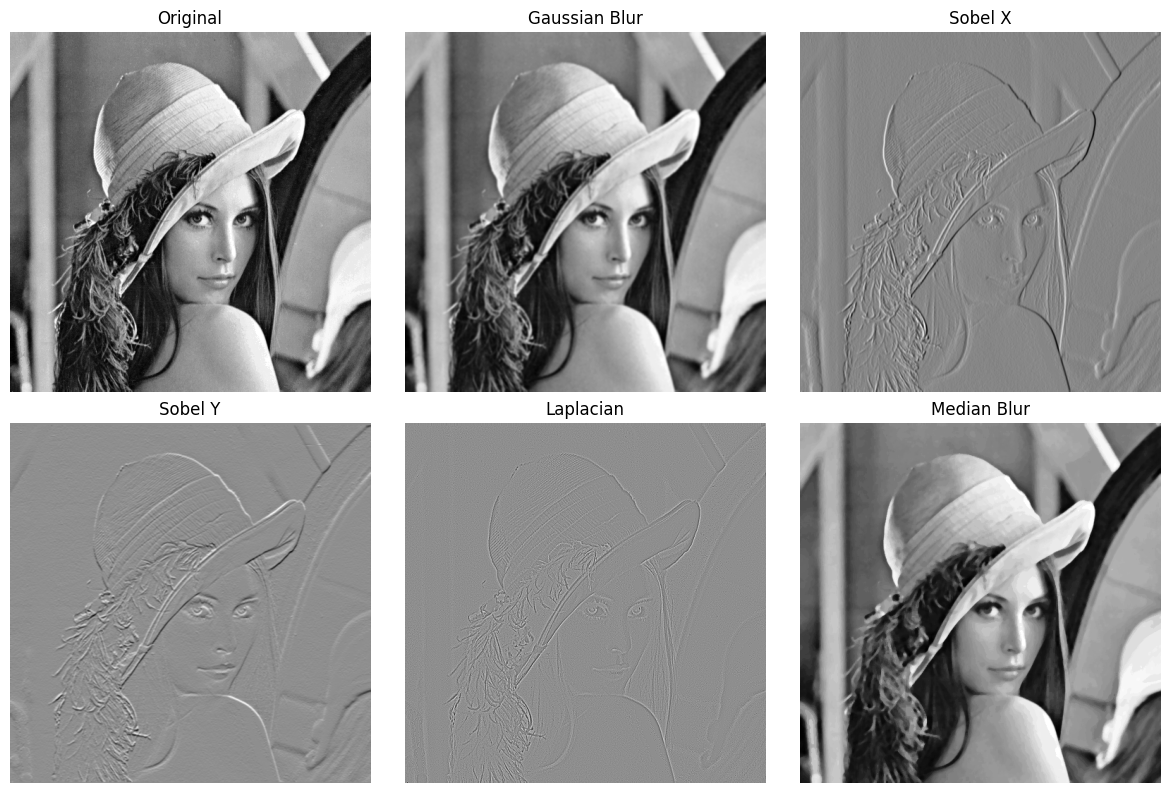

In [62]:

image = lena_gray

gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

median_blur = cv2.medianBlur(image, 5)

#plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Blur')
plt.axis('off')

plt.tight_layout()
plt.show()


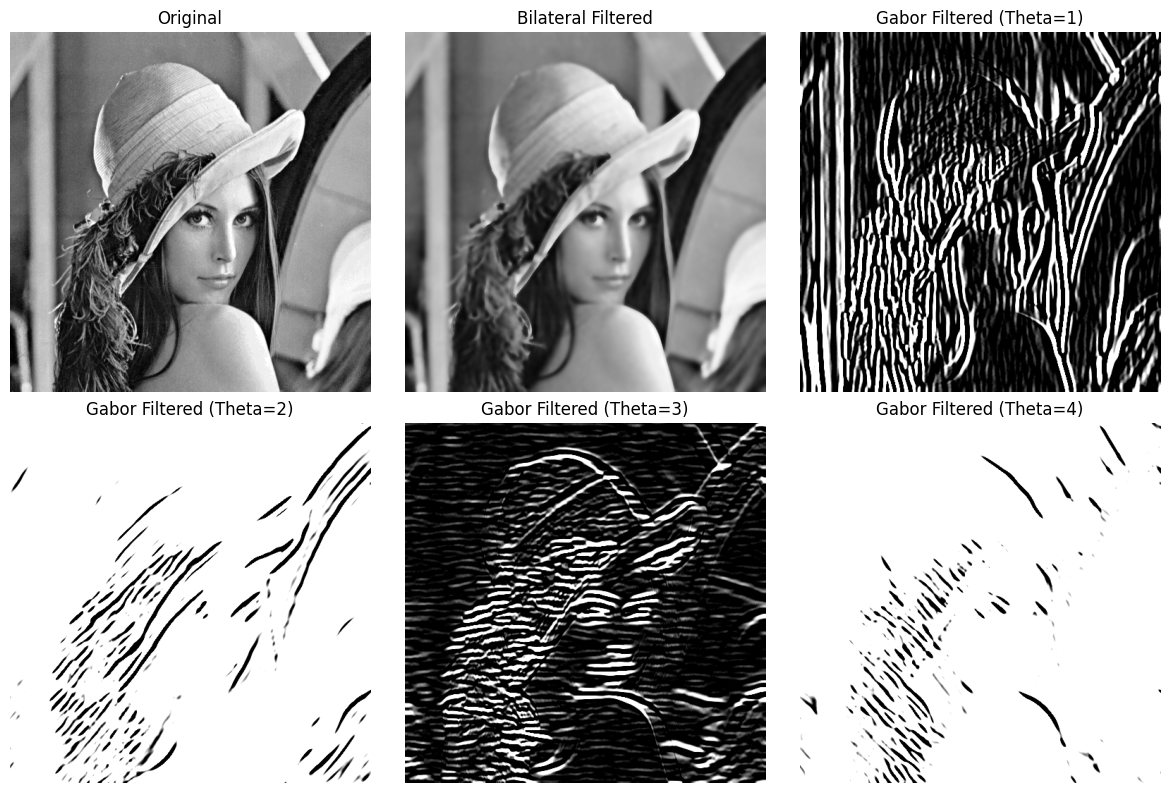

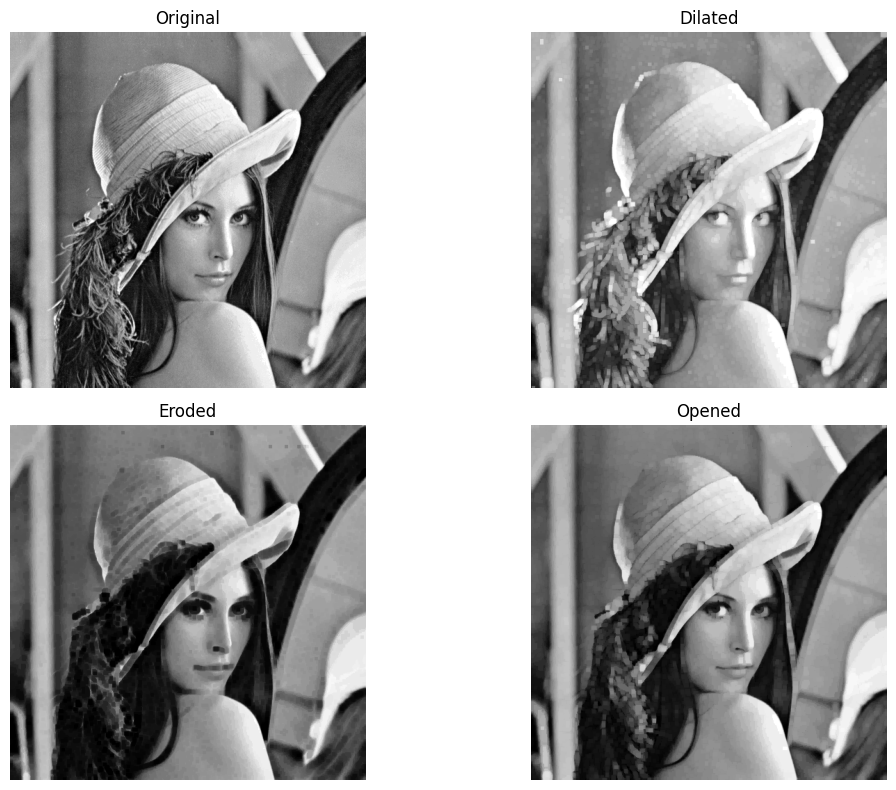

In [63]:
import numpy as np
image = cv2.imread('mats/lena.png', cv2.IMREAD_GRAYSCALE)

bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    kernel = cv2.getGaborKernel((21, 21), 5.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    kernels.append(kernel)

gabor_filtered = []
for kernel in kernels:
    filtered = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    gabor_filtered.append(filtered)

kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(image, kernel, iterations=1)
eroded = cv2.erode(image, kernel, iterations=1)
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered')
plt.axis('off')

for i in range(4):
    plt.subplot(2, 3, i+3)
    plt.imshow(gabor_filtered[i], cmap='gray')
    plt.title(f'Gabor Filtered (Theta={i+1})')
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(opened, cmap='gray')
plt.title('Opened')
plt.axis('off')

plt.tight_layout()
plt.show()
